In [1]:
import os, sys
sys.path.append('../../src')

from datetime import datetime

import visualization.visualize as vis
from data.load_dataset import load_dataset
from models.train_model import get_dataloaders, set_and_train_model
from models.model import get_model, evaluate_model, save_model

## Prepare the data

In [2]:
db_number = 1
round_number = 1

In [3]:
df = load_dataset(db_number)
df

,ID,img_filepath,split,round_number,class label
0,7,c:/Users/weldl/Workspace/IFSP-Final-Project/da...,train,1,No Finding
1,8,c:/Users/weldl/Workspace/IFSP-Final-Project/da...,train,3,Cardiomegaly
2,8,c:/Users/weldl/Workspace/IFSP-Final-Project/da...,train,4,No Finding
3,8,c:/Users/weldl/Workspace/IFSP-Final-Project/da...,train,5,Nodule
4,18,c:/Users/weldl/Workspace/IFSP-Final-Project/da...,valid,1,No Finding
...,...,...,...,...,...
22289,30789,c:/Users/weldl/Workspace/IFSP-Final-Project/da...,train,1,Infiltration
22290,30790,c:/Users/weldl/Workspace/IFSP-Final-Project/da...,test,1,No Finding
22291,30792,c:/Users/weldl/Workspace/IFSP-Final-Project/da...,valid,2,No Finding
22292,30792,c:/Users/weldl/Workspace/IFSP-Final-Project/da...,valid,4,No Finding


In [4]:
dataloaders = get_dataloaders(df.sample(1000), round_number)

train_set size: 250
valid_set size: 80
test_set size: 78
total: 408


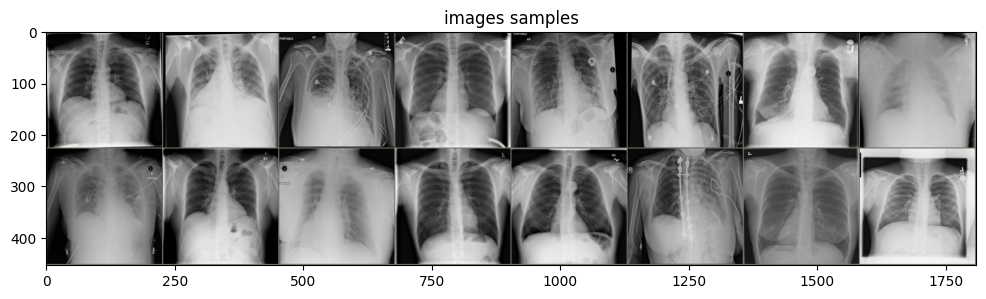

In [5]:
### Visualize a few images
# Let's visualize a few training images so as to understand the data augmentations.

vis.plot_samples(dataloaders['train'])

## Set the Model

In [6]:
model = get_model()

Cuda available: True. Model sento to device: cuda:0.


## Train the model

In [7]:
num_epochs = 10

In [8]:
model, model_hist = set_and_train_model(model, dataloaders, num_epochs=num_epochs)


Epoch 0/9
----------
train Loss: 0.7030 Acc: 0.5080
valid Loss: 0.6834 Acc: 0.5000
0m 12s/epoch

Epoch 1/9
----------
train Loss: 0.6282 Acc: 0.6680
valid Loss: 0.8499 Acc: 0.4750
0m 8s/epoch

Epoch 2/9
----------
train Loss: 0.5794 Acc: 0.6840
valid Loss: 0.7329 Acc: 0.5625
0m 9s/epoch

Epoch 3/9
----------
train Loss: 0.5473 Acc: 0.7200
valid Loss: 0.6981 Acc: 0.5625
0m 9s/epoch

Epoch 4/9
----------
train Loss: 0.4078 Acc: 0.8600
valid Loss: 0.7817 Acc: 0.5750
0m 9s/epoch

Epoch 5/9
----------
train Loss: 0.3144 Acc: 0.9440
valid Loss: 0.7414 Acc: 0.5625
0m 9s/epoch

Epoch 6/9
----------
train Loss: 0.2583 Acc: 0.9320
valid Loss: 0.8060 Acc: 0.6250
0m 9s/epoch

Epoch 7/9
----------
train Loss: 0.1822 Acc: 0.9800
valid Loss: 0.7748 Acc: 0.6375
0m 9s/epoch

Epoch 8/9
----------
train Loss: 0.2022 Acc: 0.9720
valid Loss: 0.8544 Acc: 0.6625
0m 9s/epoch

Epoch 9/9
----------
train Loss: 0.1907 Acc: 0.9880
valid Loss: 0.7861 Acc: 0.6375
0m 9s/epoch
Training complete in 1m 34s
Best val Ac

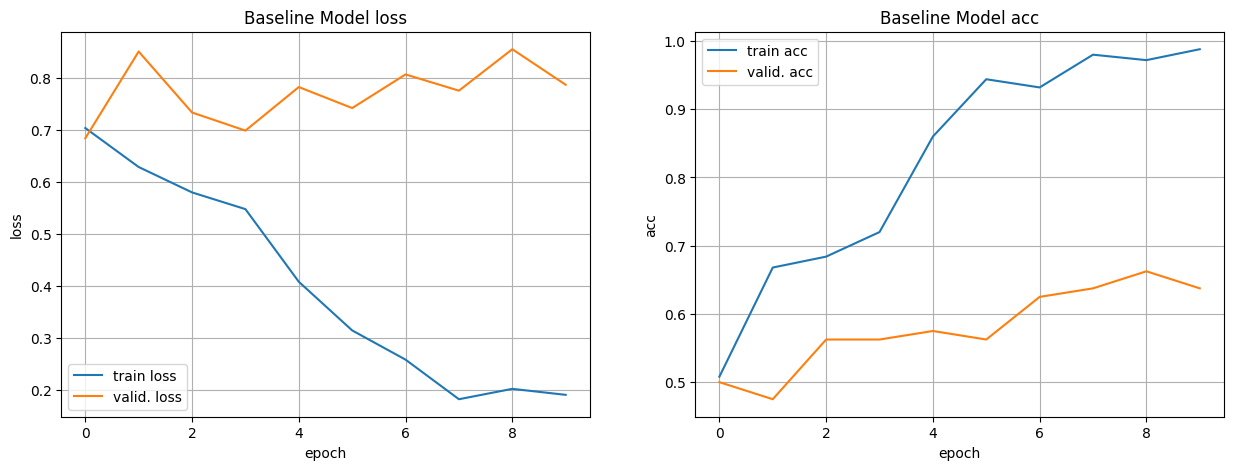

In [9]:
vis.plot_model_hist(model_hist, 'Baseline Model')

## Evaluate model predictions

In [10]:
model_stats = evaluate_model(model, dataloaders, split='test')


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.63      0.77      0.69        44
         1.0       0.58      0.41      0.48        34

    accuracy                           0.62        78
   macro avg       0.61      0.59      0.59        78
weighted avg       0.61      0.62      0.60        78



In [11]:
model_stats

{'accuracy_score': 0.6153846153846154,
 'balanced_accuracy_score': 0.5922459893048129,
 'recall_score': 0.4117647058823529,
 'precision_score': 0.5833333333333334,
 'f1_score': 0.4827586206896552,
 'confusion_matrix': array([[34, 10],
        [20, 14]], dtype=int64)}

## Saving current model:

In [12]:
exec_time = datetime.now()
model_name = f'{exec_time.year}-{exec_time.month}-{exec_time.day}_{exec_time.hour}h{exec_time.minute}m{exec_time.second}s_db{db_number}_round{round_number}'
save_model(model, model_name)

2022-10-4_22h19m32s_db1_round1 saved at ../../models/2022-10-4_22h19m32s_db1_round1.pth
